In [1]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from joblib import load,dump

import sys
sys.path.insert(0,'../scripts/')
from processDynamic import processDynamic

In [2]:
# # I saved my own model data as pickle files, but may not need
# model_output = load('../data/p14model-ocv.pkl')
# model_data = load('../data/p14model-data.pkl')

In [3]:
# Note, had to resave this data in Octave like so: save -mat7-binary 'file.mat' model
# data = scipy.io.loadmat('../data/P14model-ocv-mat7.mat', simplify_cells=True)

In [4]:
#data['model']['model'].keys()

In [5]:
test = processDynamic(model_dir='../data/')

In [6]:
test.load_data()

In [7]:
#plt.plot(test.data[5]['script1']['time'],test.data[5]['script1']['current'])

In [8]:
test.process_DYN_step1()

25 14.531852290290429
5 14.482598404517704
45 14.414656461803379


In [9]:
test.process_DYN_step2()

In [10]:
#test.model[5]['OCV'][0]

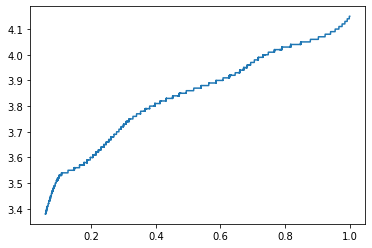

In [31]:
plt.plot(test.model[5]['Z'],test.model[5]['OCV'][0])

In [ ]:
=optfn(theGParam,data,model,theTemp,doHyst)
  global bestcost

  model.GParam(model.temps == theTemp) = abs(theGParam);
  [cost,model] = minfn(data,model,theTemp,doHyst);
  if cost<bestcost, % update plot of model params for every improvement
    bestcost = cost;
    disp('    The model created for this value of gamma is the best ESC model yet!');
  end